In [1]:
psrname='J1857+0943'

In [2]:
EPTA_dir='/home/subhajit/EPTA_ONLY/'+psrname+'/results/'
EINPTA_dir='/home/subhajit/EPTA+INPTA/'+psrname+'/results/'

In [3]:
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd

2023-03-16 18:44:18.939481: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-16 18:44:18.966983: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-16 18:44:18.967586: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-16 18:44:19.477101: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
epta_1=np.loadtxt(EPTA_dir+'TNfinal-'+psrname+'-post_equal_weights.dat')
par_epta=pd.read_csv(EPTA_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
len_epta=len(par_epta)
epta_2=epta_1.T

In [5]:
einpta_1=np.loadtxt(EINPTA_dir+'TNfinal-'+psrname+'-post_equal_weights.dat')
par_einpta=pd.read_csv(EINPTA_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
len_einpta=len(par_einpta)
einpta_2=einpta_1.T

In [13]:
epta_arr=[epta_2[len(par_epta)-2],epta_2[len(par_epta)-1]]

einpta_arr=[einpta_2[len(par_einpta)-2],einpta_2[len(par_einpta)-1]]

In [7]:
names = ['logA','gamma']
labels=['\log A_{DM}','\gamma_{DM}']
del_names=['delta_logA','delta_gamma']

In [15]:
epta=MCSamples(samples=np.array(epta_arr).transpose(),loglikes=epta_2[-1],names=names,labels=labels,label='EPTA')
einpta=MCSamples(samples=np.array(einpta_arr).transpose(),loglikes=einpta_2[-1],names = names,labels=labels,label='EPTA+INPTA \n'+psrname)

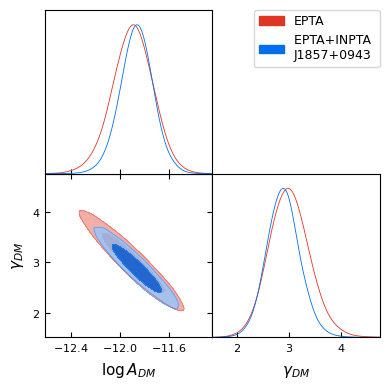

In [16]:
g = plots.get_subplot_plotter()
g.triangle_plot([epta,einpta], filled=True)
plt.savefig(psrname+'_DM.png',dpi=300)

In [18]:
from diff_chain import  Diff_chain_shift

In [19]:
diff_chain, shift_probability, shift_lower, shift_upper=Diff_chain_shift(epta,einpta)

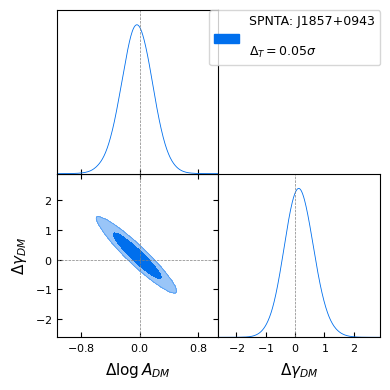

In [20]:
g = plots.get_subplot_plotter()
nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain, filled=True,legend_labels = ['SPNTA: '+psrname+'\n\n$\Delta_T=$'+
                        str("{:.2f}".format(nsig))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
plt.savefig(psrname+'_diff.png',dpi=300)

In [23]:
def plot_diff_chain(A1,A2,lims=None,off_size=None):
    diff_chain, shift_probability, shift_lower, shift_upper=Diff_chain_shift(A1,A2,off_size)
    nsig=utilities.from_confidence_to_sigma(shift_probability)
    # plot the contour for a sanity check:
    g = plots.get_single_plotter()
    diff_chain.updateSettings({'contours': [shift_probability,0.68, 0.95]})
    g.settings.num_plot_contours = 3
    g.plot_2d(diff_chain,param1=del_names[0], param2=del_names[1], solid_colors='r',filled=True,lims=lims)
    g.add_legend([ A1.getLabel()+' & '+A2.getLabel()+ 
                  '\n'+psrname+'\n $\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True);
    g.add_x_marker(0)
    g.add_y_marker(0)
    plt.savefig(A1.getLabel()+'_'+A2.getLabel()+'.png',dpi=300)
    
    return diff_chain,shift_probability

(<getdist.mcsamples.MCSamples at 0x7f8d63c54cd0>, 0.041864951105120556)

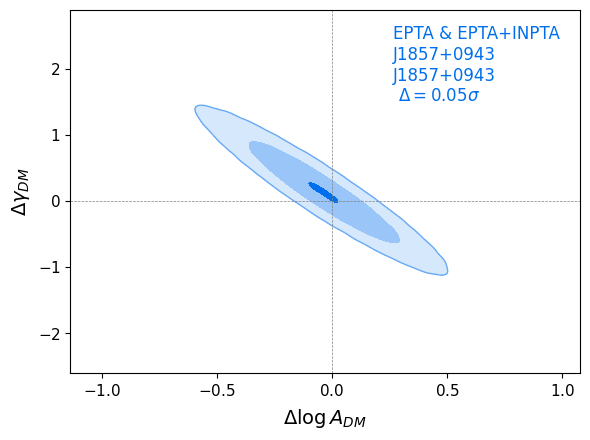

In [24]:
plot_diff_chain(epta,einpta)